# scikit-learn

scikit-learn is the main Machine Learning library in Python. It implements all classical tasks of ML: regression, classficition, clustering, dimensionality reduction and provides a number of tools to deal with data such as scaling, feature selection etc.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins.dropna(inplace=True)

In [5]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


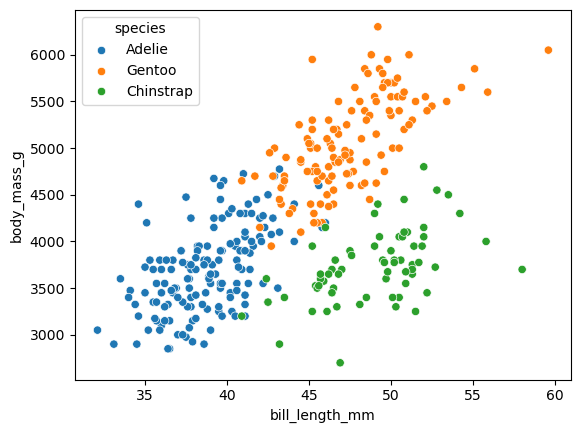

In [6]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species');

Can we classify penguins just based on the two features above? Obviously a single feature is not sufficient (no clear threshold) but more features might help.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
X = penguins[['bill_length_mm', 'body_mass_g']]
#X = penguins.drop(columns=['species', 'island','sex','year'])
y = penguins['species']

In [40]:
X

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
4,36.7,3450.0
5,39.3,3650.0
...,...,...
339,55.8,4000.0
340,43.5,3400.0
341,49.6,3775.0
342,50.8,4100.0


In [41]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X=X, y=y)

DecisionTreeClassifier(max_depth=2)

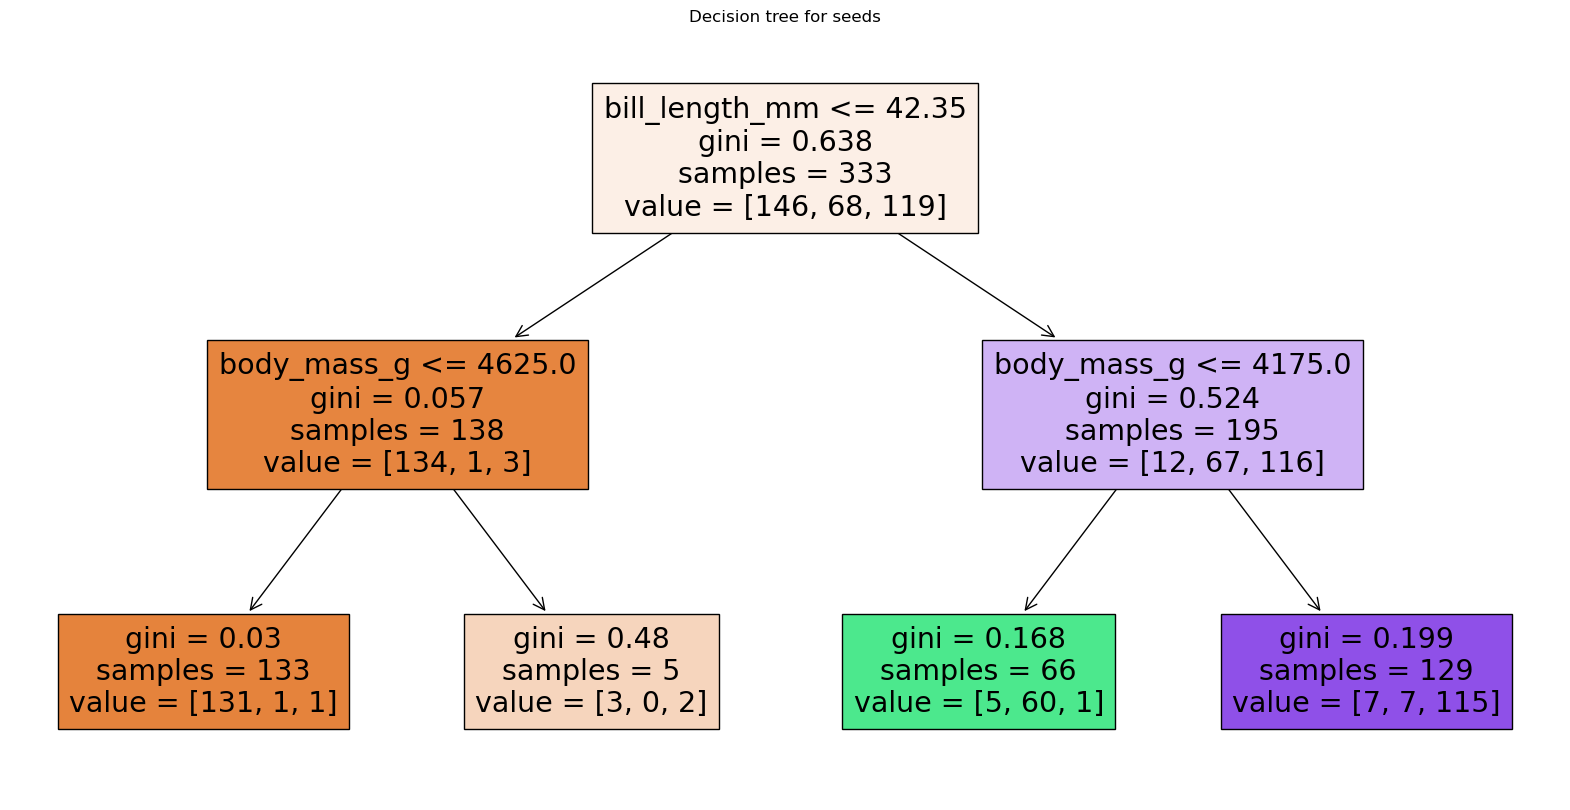

In [42]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,10))
plot_tree(tree_clf, filled=True, ax=ax, feature_names=X.columns)
plt.title("Decision tree for seeds")
plt.show()

## Clustering

In clustering, we don't know the labels but try to group points in classes:

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [44]:
X = penguins[['bill_length_mm', 'body_mass_g']]
X_scaled = StandardScaler().fit_transform(X)

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X=X_scaled)

KMeans(n_clusters=3)

Let's check the prediction and compare it to the actual categories:

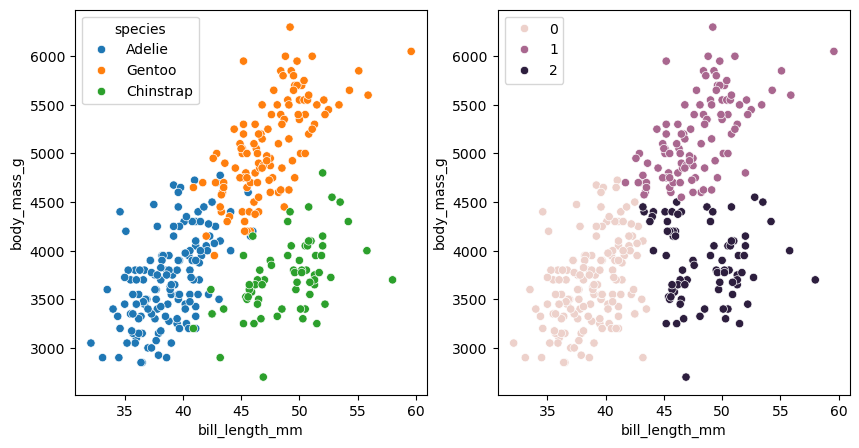

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', ax=ax[0])
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue=kmeans_model.labels_, ax=ax[1]);